# Deep Learning Con Tensorflow

Tomado del curso [Deep Learning con Tensorflow para Machine Learning e IA](https://www.udemy.com/course/tensorflow-python/) del profesor [Juan Gabriel Gomila Salas](https://github.com/joanby/tensorflow).

## Operaciones en el grafo de computación

In [1]:
import tensorflow as tf
session = tf.Session()

In [2]:
import numpy as np

In [4]:
x_vals = np.array([2.,4.,6.,8.,10.,12.])

In [6]:
x_data = tf.placeholder(tf.float32)

In [8]:
m_const = tf.constant(3.)

$$ y = mx = 3x $$

In [10]:
my_product = tf.multiply(m_const, x_data)
my_product

<tf.Tensor 'Mul_1:0' shape=<unknown> dtype=float32>

In [12]:
for x_val in x_vals:
    print(session.run(my_product, feed_dict = {x_data: x_val}))

6.0
12.0
18.0
24.0
30.0
36.0


In [13]:
print(session.run(my_product, feed_dict = {x_data: x_vals}))

[ 6. 12. 18. 24. 30. 36.]


In [14]:
session.run(tf.multiply(m_const, x_vals))

array([ 6., 12., 18., 24., 30., 36.], dtype=float32)

## Operaciones por capas

In [17]:
import tensorflow as tf
session = tf.Session()

In [18]:
import numpy as np

In [20]:
my_array = np.array([[1.,3.,5.,7.],
                    [-2.,0.,7.,6.],
                    [-6.,-1.,0.,3.]])
my_array

array([[ 1.,  3.,  5.,  7.],
       [-2.,  0.,  7.,  6.],
       [-6., -1.,  0.,  3.]])

In [21]:
x_vals = np.array([my_array, my_array+1])
x_vals

array([[[ 1.,  3.,  5.,  7.],
        [-2.,  0.,  7.,  6.],
        [-6., -1.,  0.,  3.]],

       [[ 2.,  4.,  6.,  8.],
        [-1.,  1.,  8.,  7.],
        [-5.,  0.,  1.,  4.]]])

In [29]:
x_data = tf.placeholder(tf.float32, shape=(3,None))

In [25]:
m1 = tf.constant([[1.],[0.],[-2.],[5.]])
m2 = tf.constant([[7.]])
a1 = tf.constant([[15.]])

$$(X\cdot m_1)m_2+a_1$$

In [31]:
prod1 = tf.matmul(x_data, m1)
prod2 = tf.matmul(prod1, m2)
add1 = tf.add(prod2, a1)

In [32]:
for x_val in x_vals:
    print(session.run(add1, feed_dict={x_data: x_val}))

[[197.]
 [113.]
 [ 78.]]
[[225.]
 [141.]
 [106.]]


## Trabajar con múltiples capas

In [46]:
import tensorflow as tf
import numpy as np
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.InteractiveSession()
# session = tf.Session()

C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [47]:
x_shape = [1,4,4,1]
x_val = np.random.uniform(size = x_shape)
x_val

array([[[[0.06128026],
         [0.87156032],
         [0.72401941],
         [0.60112092]],

        [[0.8891606 ],
         [0.28728361],
         [0.83489501],
         [0.40807198]],

        [[0.7320763 ],
         [0.75241017],
         [0.79797285],
         [0.77101396]],

        [[0.76440585],
         [0.00251679],
         [0.54689621],
         [0.13860781]]]])

In [48]:
x_data = tf.placeholder(tf.float32, shape = x_shape)

In [49]:
my_filter = tf.constant(0.25, shape = [2,2,1,1])
my_strides = [1,2,2,1]
mov_avg_layer = tf.nn.conv2d(x_data, my_filter,my_strides, padding='SAME', name='Moving_Average_Wnd')

$$\frac{W-F+2P}{S}+1$$

- W : dimensión de entrada
- F: Dimensión del filtro
- P: Padding
- S: Stride

In [50]:
def custom_layer(input_matrix):
    input_matrix_squeezed  =tf.squeeze(input_matrix)
    A = tf.constant([[1.,2.],[3.,4.]])
    b = tf.constant(1., shape=[2,2])
    temp1 = tf.matmul(A, input_matrix_squeezed)
    temp2 = tf.add(temp1, b)
    return tf.sigmoid(temp2)

In [51]:
with tf.name_scope("Custom_layer") as scope:
    customlayer1 = custom_layer(mov_avg_layer) 

In [52]:
session.run(customlayer1, feed_dict={x_data: x_val})

array([[0.9341972 , 0.94099253],
       [0.9921033 , 0.9944067 ]], dtype=float32)

### Tensorboard

In [53]:
writer = tf.summary.FileWriter('multiple-layes', session.graph)
session.run(customlayer1, feed_dict={x_data: x_val})
writer.close()

## Funciones de pérdida en predicción

In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt
session = tf.Session()

In [57]:
x_vals = tf.linspace(-1.,1.,500)
target = tf.constant(0.)

### Norma L2 (distancia Euclidiana)

$$L2(y_r, y_p) = \sqrt{\sum(y_r-y_p)^2}$$

In [10]:
l2_y_vals = tf.square(target-x_vals)
l2_y_out = session.run(l2_y_vals)

In [8]:
l2_y_vals = tf.sqrt(tf.reduce_sum(tf.square(target-x_vals)))
l2_y_out = session.run(l2_y_vals)
print((l2_y_out**2)/2)

1338.6773162148966


In [67]:
session.run(tf.nn.l2_loss(target-x_vals))

83.667336

### Norma L1

$$L1(y_r,y_p)=|y_r-y_p|$$

In [70]:
l1_y_vals = tf.abs(target-x_vals)

In [71]:
l1_y_out = session.run(l1_y_vals)

In [73]:
print(l1_y_out)

[1.         0.995992   0.99198395 0.98797596 0.98396796 0.9799599
 0.9759519  0.9719439  0.96793586 0.96392787 0.9599198  0.9559118
 0.9519038  0.94789577 0.94388777 0.9398798  0.9358717  0.9318637
 0.92785573 0.9238477  0.9198397  0.9158317  0.91182363 0.90781564
 0.90380764 0.8997996  0.8957916  0.8917836  0.88777554 0.88376755
 0.87975955 0.8757515  0.8717435  0.8677355  0.86372745 0.85971946
 0.8557114  0.8517034  0.8476954  0.84368736 0.83967936 0.8356713
 0.8316633  0.8276553  0.82364726 0.81963927 0.8156313  0.8116232
 0.8076152  0.8036072  0.7995992  0.7955912  0.7915832  0.7875751
 0.78356713 0.77955914 0.7755511  0.7715431  0.7675351  0.76352704
 0.75951904 0.75551105 0.751503   0.747495   0.743487   0.73947895
 0.73547095 0.73146296 0.7274549  0.72344685 0.7194389  0.71543086
 0.7114228  0.70741487 0.7034068  0.69939876 0.6953908  0.69138277
 0.6873747  0.6833667  0.6793587  0.67535067 0.6713427  0.6673347
 0.6633266  0.6593186  0.65531063 0.6513026  0.6472946  0.6432866
 0.

### Pseudo-Huber

$$PH(y_r,y_p) = \delta^2 \cdot \sqrt{1+\left(\frac{y_r-y_p}{\delta}\right)^2}-1, \delta > 0$$

In [75]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1.+tf.square((target-x_vals)/delta1))-.1)

In [76]:
phuber1_y_out = session.run(phuber1_y_vals)
print(phuber1_y_out)

[0.2514441  0.25047213 0.2495004  0.24852893 0.24755764 0.24658659
 0.24561578 0.24464527 0.24367496 0.2427049  0.24173515 0.24076563
 0.23979636 0.23882735 0.23785861 0.23689017 0.23592193 0.23495403
 0.23398636 0.23301901 0.23205197 0.23108518 0.23011866 0.22915247
 0.2281866  0.227221   0.22625573 0.22529078 0.22432612 0.22336179
 0.22239776 0.2214341  0.22047074 0.21950775 0.21854503 0.21758276
 0.21662077 0.21565916 0.2146979  0.213737   0.21277645 0.21181628
 0.21085653 0.20989713 0.20893814 0.20797952 0.2070213  0.20606348
 0.20510611 0.20414913 0.20319253 0.20223643 0.20128073 0.20032547
 0.19937061 0.19841626 0.19746235 0.19650891 0.19555594 0.19460341
 0.19365141 0.1926999  0.19174886 0.19079834 0.18984833 0.18889885
 0.18794988 0.18700147 0.18605357 0.18510623 0.1841595  0.18321328
 0.18226765 0.1813226  0.18037817 0.17943433 0.17849112 0.17754848
 0.17660652 0.17566518 0.1747245  0.17378448 0.17284511 0.17190646
 0.17096847 0.17003122 0.16909468 0.16815884 0.16722377 0.1662

## Funciones de pérdida para problemas de clasificación

In [4]:
import tensorflow as tf
import numpy as np
session = tf.Session()

In [5]:
x_vals = tf.linspace(-3.,5.,500)
target = tf.constant(1.)
targets = tf.fill([500,],1.)

### Hinge (función bisagra)

$$H(y_r,y_p)=max(0, 1-y_r\cdot y_p)$$

In [8]:
hinge_y_vals = tf.maximum(0., 1.0 - tf.multiply(target, x_vals))
hinge_y_out = session.run(hinge_y_vals)
print(hinge_y_out)

[4.         3.983968   3.9679358  3.9519038  3.9358718  3.9198396
 3.9038076  3.8877757  3.8717434  3.8557115  3.8396792  3.8236473
 3.8076153  3.791583   3.775551   3.759519   3.743487   3.727455
 3.711423   3.6953907  3.6793587  3.6633267  3.6472945  3.6312625
 3.6152306  3.5991983  3.5831664  3.5671344  3.5511022  3.5350702
 3.5190382  3.503006   3.486974   3.470942   3.4549098  3.4388778
 3.4228456  3.4068136  3.3907816  3.3747494  3.3587174  3.3426852
 3.3266532  3.3106213  3.294589   3.278557   3.262525   3.2464929
 3.230461   3.214429   3.1983967  3.1823647  3.1663327  3.1503005
 3.1342685  3.1182365  3.1022043  3.0861723  3.0701404  3.0541081
 3.0380762  3.0220442  3.006012   2.98998    2.973948   2.9579158
 2.9418838  2.9258518  2.9098196  2.8937874  2.8777556  2.8617234
 2.8456912  2.8296595  2.8136272  2.797595   2.7815633  2.765531
 2.7494988  2.7334669  2.717435   2.7014027  2.6853707  2.6693387
 2.6533065  2.6372745  2.6212425  2.6052103  2.5891783  2.5731463
 2.5571141  

### Entropía cruzada (función logística)

$$H(y_r,y_p) = -y_r\cdot log(y_p) - (1-y_r)\cdot log(1-y_p)$$

In [12]:
xentr_y_vals = -tf.multiply(target, tf.log(x_vals)) - tf.multiply((1.-target), tf.log(1.-x_vals))
xentr_y_out = session.run(xentr_y_vals)
print(xentr_y_out)

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

### Entropía cruzada de sigmoide (evitar nans)

$$H(y_r,y_p) = -y_r\cdot log\left(\frac{1}{1+e^{-y_p}}\right) - (1-y_r)\cdot log\left(1-\frac{1}{1+e^{-y_p}}\right)$$

In [16]:
xentr_sig_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels = targets)
xentr_sig_y_out = session.run(xentr_sig_y_vals)
print(xentr_sig_y_out)

[3.0485873  3.0333216  3.0180674  3.0028253  2.9875953  2.9723773
 2.9571722  2.9419796  2.9267998  2.9116333  2.8964796  2.8813396
 2.866213   2.8511002  2.8360016  2.8209174  2.805847   2.7907915
 2.7757509  2.7607253  2.7457147  2.7307198  2.7157404  2.700777
 2.6858296  2.6708984  2.6559842  2.6410863  2.6262057  2.6113422
 2.5964963  2.581668   2.5668578  2.5520658  2.5372922  2.5225375
 2.5078013  2.493085   2.4783878  2.4637103  2.4490528  2.4344156
 2.419799   2.4052036  2.3906288  2.3760755  2.3615441  2.3470345
 2.332547   2.3180823  2.3036401  2.2892213  2.2748258  2.2604537
 2.246106   2.2317827  2.2174835  2.2032096  2.188961   2.174738
 2.1605408  2.14637    2.1322253  2.1181078  2.1040173  2.0899544
 2.0759194  2.0619125  2.0479343  2.0339847  2.0200646  2.006174
 1.9923133  1.978483   1.964683   1.9509143  1.9371768  1.923471
 1.9097973  1.8961561  1.8825476  1.8689723  1.8554305  1.8419226
 1.828449   1.8150101  1.8016063  1.7882378  1.7749051  1.7616086
 1.7483487  1.

In [19]:
pos_weight = tf.constant(0.5)
xentr_sig_w_y_vals = tf.nn.weighted_cross_entropy_with_logits(logits=x_vals, targets = targets, pos_weight = pos_weight)
xentr_sig_w_y_out = session.run(xentr_sig_w_y_vals)
print(xentr_sig_w_y_out)

[1.5242937  1.5166608  1.5090337  1.5014126  1.4937977  1.4861887
 1.4785861  1.4709898  1.4633999  1.4558166  1.4482398  1.4406698
 1.4331065  1.4255501  1.4180008  1.4104587  1.4029235  1.3953958
 1.3878754  1.3803626  1.3728573  1.3653599  1.3578702  1.3503885
 1.3429148  1.3354492  1.3279921  1.3205432  1.3131028  1.3056711
 1.2982482  1.290834   1.2834289  1.2760329  1.2686461  1.2612687
 1.2539006  1.2465425  1.2391939  1.2318552  1.2245264  1.2172078
 1.2098995  1.2026018  1.1953144  1.1880378  1.1807721  1.1735172
 1.1662735  1.1590412  1.1518201  1.1446106  1.1374129  1.1302269
 1.123053   1.1158913  1.1087418  1.1016048  1.0944805  1.087369
 1.0802704  1.073185   1.0661126  1.0590539  1.0520086  1.0449772
 1.0379597  1.0309563  1.0239671  1.0169923  1.0100323  1.003087
 0.99615663 0.9892415  0.9823415  0.97545713 0.9685884  0.9617355
 0.95489866 0.94807804 0.9412738  0.93448615 0.92771524 0.9209613
 0.9142245  0.90750504 0.90080315 0.8941189  0.88745254 0.8808043
 0.87417436 

### Softmax Cross Entropy (probabilidad)

$$SM(z_k) = \frac{e^{z_k}}{\sum_{i=1}^n e^{z_i}}$$

In [21]:
unscaled_logits = tf.constant([[1.,-3.,10.]])
target_dist = tf.constant([[0.1,0.02,0.88]])
softmax_xentr = tf.nn.softmax_cross_entropy_with_logits_v2(logits = unscaled_logits, labels = target_dist)
softmax_xentr_y_out = session.run(softmax_xentr)
print(softmax_xentr_y_out)

[1.1601256]


### Sparse softmax cross entropy (vector 0s y un 1)

In [ ]:
unscaled_logits = tf.constant([[1.,-3.,10.]])
target_dist = tf.constant([[2]])
softmax_xentr = tf.nn.softmax_cross_entropy_with_logits_v2(logits = unscaled_logits, labels = target_dist)
softmax_xentr_y_out = session.run(softmax_xentr)
print(softmax_xentr_y_out)

### Evaluar las funciones de pérdida

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

#### Para predicción

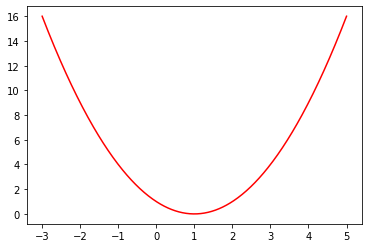

In [11]:
x_array = session.run(x_vals)
plt.plot(x_array, l2_y_out, 'r-', label='L2')
plt.show()